# Limpieza de datos

Para el presente proyecto se tomaron los datos de la página de la DIAN. Se utilizaron los últimos datos disponibles (2022).

En el siguiente link se encuentra el diccionario de dichos datos:https://microdatos.dane.gov.co/index.php/catalog/804/data-dictionary/F16?file_name=Personas 

Este notebook busca limpiar los datos para dejarlos listos para la aplicación de modelos de clustering. 

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura de datos

Descargamos una muestra del dataset en la carpeta data. Vamos a empezar a explorarlo

In [222]:
personas_data = pd.read_csv('data/nivel_pobreza_personas.csv', index_col='Unnamed: 0')
personas_data.head()

,directorio,secuencia_p,orden,clase,dominio,mes,p3271,p6040,p6050,p6090,...,iof2es,iof3hes,iof3ies,iof6es,ingtotob,ingtotes,ingtot,fex_c,dpto,fex_dpto
1,5000000.0,1,1,1,RESTO URBANO,1,1,33,1,2,...,NaN,NaN,NaN,NaN,768000.0,NaN,768000.0,119.371944,8,189.039972
2,5000000.0,1,2,1,RESTO URBANO,1,2,31,2,2,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,119.371944,8,189.039972
3,5000000.0,1,3,1,RESTO URBANO,1,2,11,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972
4,5000000.0,1,4,1,RESTO URBANO,1,2,5,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972
5,5000000.0,1,5,1,RESTO URBANO,1,1,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972


In [223]:
personas_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240001 entries, 1 to 240001
Columns: 132 entries, directorio to fex_dpto
dtypes: float64(122), int64(9), object(1)
memory usage: 243.5+ MB


### Análisis

- Estamos tratando con una muestra el dataset del reporte de 2022 para Medición de pobreza monetaria y desigualdad del 2022.

- Tenemos inicialmente 132 columnas y 2400.001 registros.

- Podemos observar algunos datos nulos. Se decide proceder con el análisis para tomar decisiones sobre su importancia. 

## Descripción datos

Para las 132 columnas tenemos las siguientes descripciones según el diccionario de datos de la DIAN:

| Variable       | Descripción                                                                                                                                                                        |
|:---------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| directorio     | Directorio                                                                                                                                                                         |
| llave_vivienda | Llave de vivienda                                                                                                                                                                  |
| secuencia_p    | Secuencia_p                                                                                                                                                                        |
| llave_hogar    | Llave de hogar                                                                                                                                                                     |
| orden          | Orden                                                                                                                                                                              |
| llave_persona  | Llave de persona                                                                                                                                                                   |
| clase          | 1. Cabecera, 2. Resto (centros poblados y área rural dispersa)                                                                                                                     |
| dominio        | Dominio                                                                                                                                                                            |
| mes            | Mes                                                                                                                                                                                |
| p3271          | Sexo                                                                                                                                                                               |
| p6040          | ¿Cuántos años cumplidos tiene?                                                                                                                                                     |
| p6050          | ¿Cuál es el parentesco de ...Con el jefe o jefa del hogar?                                                                                                                         |
| p6090          | ¿... Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?                                                                                 |
| p6100          | ¿A cuál de los siguientes regímenes de seguridad social en salud está afiliado?                                                                                                    |
| p3042          | ¿Cuál es el nivel educativo más alto alcanzado por .... y el último año o grado aprobado en este nivel?                                                                            |
| p3042s1        | Grado                                                                                                                                                                              |
| p3043          | Título o diploma de mayor nivel educativo                                                                                                                                          |
| p6240          | ¿En qué actividad ocupó la mayor parte del tiempo la semana pasada?                                                                                                                |
| p6426          | ¿Cuánto tiempo lleva trabajando en esta empresa, negocio, industria, oficina, firma o finca de manera continua?                                                                    |
| p6430          | En este trabajo es (posición ocupacional primera actividad)                                                                                                                        |
| p6500          | Antes de descuentos ¿cuánto ganó el mes pasado en este empleo?                                                                                                                     |
| p6510          | ¿El mes pasado recibió ingresos por concepto de horas extras?                                                                                                                      |
| p6510s1        | ¿Cuánto recibió por horas extras?                                                                                                                                                  |
| p6510s2        | ¿Incluyó este valor en los ingresos del mes pasado?                                                                                                                                |
| p6545          | El mes pasado recibió a. Primas (técnica, de antigüedad, clima, orden público, otras, etc.)                                                                                        |
| p6545s1        | ¿Cuánto recibió por primas?                                                                                                                                                        |
| p6545s2        | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6580          | ¿El mes pasado recibió b. Bonificaciones?                                                                                                                                          |
| p6580s1        | ¿Cuánto recibió por bonificaciones?                                                                                                                                                |
| p6580s2        | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6585s1        | ¿El mes pasado recibió a. Auxilio o subsidio de alimentación?                                                                                                                      |
| p6585s1a1      | ¿Cuánto recibió por subsidio de alimentación?                                                                                                                                      |
| p6585s1a2      | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6585s2        | ¿El mes pasado recibió b. Auxilio subsidio de transporte?                                                                                                                          |
| p6585s2a1      | ¿Cuánto recibió por subsidio de transporte?                                                                                                                                        |
| p6585s2a2      | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6585s3        | ¿El mes pasado recibió c. Subsidio familiar?                                                                                                                                       |
| p6585s3a1      | ¿Cuánto recibió por subsidio familiar?                                                                                                                                             |
| p6585s3a2      | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6585s4        | ¿El mes pasado recibió d. Subsidio educativo?                                                                                                                                      |
| p6585s4a1      | ¿Cuánto recibió por subsidio educativo?                                                                                                                                            |
| p6585s4a2      | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6590          | ¿Además del salario en dinero, ¿el mes pasado recibió alimentos como parte de pago por su trabajo?                                                                                 |
| p6590s1        | ¿En cuánto estima lo que recibió? (alimentos)                                                                                                                                      |
| p6600          | ¿Además del salario en dinero, ¿el mes pasado recibió vivienda como parte de pago por su trabajo?                                                                                  |
| p6600s1        | ¿En cuánto estima lo que recibió? (vivienda)                                                                                                                                       |
| p6610          | ¿Normalmente... Utiliza transporte de la empresa para desplazarse a su trabajo (bus o automóvil)?                                                                                  |
| p6610s1        | ¿En cuánto estima lo que recibió? (transporte)                                                                                                                                     |
| p6620          | Además del salario en dinero, ¿el mes pasado... Recibió otros ingresos en especie por su trabajo (electrodomésticos, ropa, productos diferentes a alimentos o bonos tipo sodexho)? |
| p6620s1        | ¿En cuánto estima lo que recibió? (ingresos en especie)                                                                                                                            |
| p6630s1        | En los últimos 12 meses recibió … a. Prima de servicios                                                                                                                            |
| p6630s1a1      | ¿Cuánto recibió (prima de servicios)?                                                                                                                                              |
| p6630s2        | En los últimos 12 meses recibió ... B. Prima de navidad                                                                                                                            |
| p6630s2a1      | ¿Cuánto recibió? (prima de navidad))                                                                                                                                               |
| p6630s3        | En los últimos 12 meses recibió … c. Prima de vacaciones                                                                                                                           |
| p6630s3a1      | ¿Cuánto recibió? (prima de vacaciones)                                                                                                                                             |
| p6630s4        | En los últimos 12 meses recibió ... D. Viáticos permanentes                                                                                                                        |
| p6630s4a1      | ¿Cuánto recibió? (viaticos permanentes))                                                                                                                                           |
| p6630s6        | En los últimos 12 meses recibió … e. Bonificaciones anuales                                                                                                                        |
| p6630s6a1      | ¿Cuánto recibió? (bonificaciones anuales)                                                                                                                                          |
| p6750          | ¿Cuál fue la ganancia neta o los honorarios netos en esa actividad, negocio, profesión o finca, el mes pasado?                                                                     |
| p3073          | ¿A cuántos meses corresponde lo que recibió?                                                                                                                                       |
| p550           | ¿Cuál fue la ganancia neta del negocio o de la cosecha durante los últimos doce meses? (sólo para centros poblados y área rural dispersa)                                          |
| p6800          | ¿Cuántas horas a la semana trabaja normalmente.... en ese trabajo?                                                                                                                 |
| p6920          | ¿Está... Cotizando actualmente a un fondo de pensiones?                                                                                                                            |
| p7040          | Además de la ocupación principal, ¿tenía la semana pasada otro trabajo o negocio?                                                                                                  |
| p7045          | ¿Cuántas horas trabajó La semana pasada en ese segundo trabajo?                                                                                                                    |
| p7050          | En ese segundo trabajo es: (ocupación segunda actividad)                                                                                                                           |
| p7070          | ¿Cuánto recibió o ganó el mes pasado en ese segundo trabajo o negocio?                                                                                                             |
| p7090          | Además de las horas que trabaja actualmente ¿quiere trabajar más horas?                                                                                                            |
| p7110          | Durante las últimas 4 semanas, ¿hizo diligencias para trabajar más horas?                                                                                                          |
| p7120          | Si la semana pasada le hubiera resultado la posibilidad de trabajar más horas ¿ estaba...... disponible para hacerlo?                                                              |
| p7140s1        | ¿Por qué motivos desea cambiar de trabajo o empleo: a. Para mejorar la utilización de sus capacidades o formación?                                                                 |
| p7140s2        | ¿Por qué motivos desea cambiar de trabajo o empleo: b. Desea mejorar sus ingresos?                                                                                                 |
| p7150          | Durante las ÚLTIMAS 4 SEMANAS, ¿hizo diligencias para cambiar de trabajo?                                                                                                          |
| p7160          | Si le resultara un nuevo trabajo o empleo a...¿podría empezar a desempeñarlo antes de un mes?                                                                                      |
| p7350          | En este último trabajo era: … (Desocupados)                                                                                                                                        |
| p7422          | ¿Recibió o ganó el mes pasado ingresos por concepto de trabajo?. (Desocupados)                                                                                                     |
| p7422s1        | ¿Cuánto? (desocupados)                                                                                                                                                             |
| p7495          | El mes pasado, ¿recibió pagos por concepto de arriendos y/o pensiones?                                                                                                             |
| p7500s1        | ¿El mes pasado, recibió pagos por: a. arriendos de casas, apartamentos, fincas, lotes, vehículos, equipos etc?                                                                     |
| p7500s1a1      | Valor mes pasado (arriendo de casas, aptos, fincas)                                                                                                                                |
| p7500s2        | ¿El mes pasado recibió pagos por b. pensiones o jubilaciones por vejez, invalidez o sustitución pensional?                                                                         |
| p7500s2a1      | Valor mes pasado (pensiones, jubilaciones, invalidez)                                                                                                                              |
| p7500s3        | ¿El mes pasado recibió pagos por c. pensión alimenticia por paternidad, divorcio o separación?                                                                                     |
| p7500s3a1      | Valor mes pasado (pensión alimentaria))                                                                                                                                            |
| p7505          | Durante los últimos doce meses, ¿recibió dinero de otros hogares, personas o instituciones no gubernamentales; dinero por intereses, dividendos, utilidades o por cesantías?       |
| p7510s1        | Durante los últimos 12 meses, ¿recibió a. dinero de otros hogares o personas residentes en el país?                                                                                |
| p7510s1a1      | Valor (personas residentes país))                                                                                                                                                  |
| p7510s2        | Durante los últimos 12 meses, ¿recibió b. dinero de otros hogares o personas residentes fuera del país?                                                                            |
| p7510s2a1      | Valor (personas fuera del país)                                                                                                                                                    |
| p7510s3        | Durante los últimos 12 meses, ¿recibió c. ayudas en dinero de instituciones del país?                                                                                              |
| p7510s3a1      | Valor (ayuda de instituciones del país)                                                                                                                                            |
| p7510s5        | Durante los últimos 12 meses, ¿recibió d. dinero por intereses de préstamos o CDT´s, depósitos de ahorros, utilidades, ganancias o dividendos por inversiones?                     |
| p7510s5a1      | Valor (intereses, cdt)                                                                                                                                                             |
| p7510s6        | Durante los últimos 12 meses, ¿recibió e. dinero por concepto de cesantías y/o intereses a las cesantías?                                                                          |
| p7510s6a1      | Valor (cesantías)                                                                                                                                                                  |
| p7510s7        | Durante los últimos 12 meses, ¿recibió f. dinero de otras fuentes diferentes a las anteriores?                                                                                     |
| p7510s7a1      | Valor (otras fuentes)                                                                                                                                                              |
| pet            | Población en edad de trabajar 1: sí 0: no                                                                                                                                          |
| oc             | Ocupado 1: sí                                                                                                                                                                      |
| des            | Desocupado 1: sí                                                                                                                                                                   |
| ina            | Inactivo 1: sí                                                                                                                                                                     |
| impa           | Ingreso monetario de la primera actividad antes de imputación                                                                                                                      |
| isa            | Ingreso monetario de la segunda actividad antes de imputación                                                                                                                      |
| ie             | Ingreso en especie antes de imputación                                                                                                                                             |
| imdi           | Ingreso por trabajo de desocupados e inactivos antes de imputación                                                                                                                 |
| iof1           | Ingreso por intereses y dividendos antes de imputación                                                                                                                             |
| iof2           | Ingreso por jubilaciones y pensiones antes de imputación                                                                                                                           |
| iof3h          | Ingreso por ayudas de hogares, antes de imputación                                                                                                                                 |
| iof3i          | Ingreso por ayudas de instituciones, antes de imputación                                                                                                                           |
| iof6           | Ingreso por arriendos antes de imputación                                                                                                                                          |
| cclasnr2       | Estado de impa 1:faltante 0: observado                                                                                                                                             |
| cclasnr3       | Estado de isa 1:faltante 0: observado                                                                                                                                              |
| cclasnr4       | Estado de ie 1:faltante 0: observado                                                                                                                                               |
| cclasnr5       | Estado de imdi 1:faltante 0: observado                                                                                                                                             |
| cclasnr6       | Estado de iof1 1:faltante 0: observado                                                                                                                                             |
| cclasnr7       | Estado de iof2 1:faltante 0: observado                                                                                                                                             |
| cclasnr8       | Estado de iof3 1:faltante 0: observado                                                                                                                                             |
| cclasnr11      | Estado de iof6 1:faltante 0: observado                                                                                                                                             |
| impaes         | Ingreso monetario de la primera actividad imputado (sólo para faltantes, extremos o ceros inconsistentes)                                                                          |
| isaes          | Ingreso monetario de la segunda actividad imputado (sólo para faltantes o extremos)                                                                                                |
| iees           | Ingreso en especie imputado (sólo para faltantes o extremos)                                                                                                                       |
| imdies         | Ingreso por trabajo de desocupados e inactivos imputado (sólo para faltantes o extremos)                                                                                           |
| iof1es         | Ingreso por intereses y dividendos imputado (sólo para faltantes o extremos)                                                                                                       |
| iof2es         | Ingreso por jubilaciones y pensiones imputado (sólo para faltantes o extremos)                                                                                                     |
| iof3hes        | Ingreso por ayudas de hogares, imputado (sólo para faltantes o extremos)                                                                                                           |
| iof3ies        | Ingreso por ayudas de instituciones, imputado (sólo para faltantes o extremos)                                                                                                     |
| iof6es         | Ingreso por arriendos imputado (sólo para faltantes o extremos)                                                                                                                    |
| ingtotob       | Ingreso total observado                                                                                                                                                            |
| ingtotes       | Ingreso total imputado                                                                                                                                                             |
| ingtot         | Ingreso total                                                                                                                                                                      |
| fex_c          | Factor de expansión anualizado                                                                                                                                                     |
| dpto           | Dpto                                                                                                                                                                               |
| fex_dpto       | Fex_dpto                                                                                                                                                                           |

Como podemos observar, es pertinente utilizar algunas de las columnas descritas y descartar el resto puesto que podrían tener correlación unas con otras o no aportar al estudio. Se procede a realizar el análisis de estas variables para tomar la decisión

## Mapeo de las variables a utilizar

Como podemos observar en la primera parte, muchos de los nombres de las columnas se encuentran codificados, procedemos a realizar un mapeo de estos nombres para las columnas que hemos decidido observar para el análisis.

In [224]:
# Diccionario de variables
variables_dict = {
    "secuencia_p": "n_personas_hogar",
    "clase": "lugar_vivienda",
    "p3271": "sexo",
    "p6040": "edad",
    "p6090": "tiene_seguridad_social",
    "p3042": "nivel_educativo",
    "p6240": "ocupacion",
    "p6500": "salario_antes_dctos",
    "p6590": "recibio_alimentos_pago_trabajo",
    "p6600": "recibio_vivienda_pago_trabajo",
    "p6610": "recibio_transporte_empresa",
    "p6620": "recibio_pago_especie",
    "p6630s6": "recibio_bonificaciones_anuales",
    "p6800": "horas_semana_trabajo",
    "p6920": "cotiza_pension",
    "p7040": "tiene_segundo_trabajo",
    "p7045": "horas_semana_trabajo_segundo",
    "p7050": "ocupacion_segundo_trabajo",
    "p7070": "salario_segundo_trabajo",
    "p7500s1": "recibio_pagos_arriendos",
    "p7500s2": "recibio_pagos_pension",
    "p7500s3": "recibio_pagos_pension_alimentaria",
    "p7510s1": "recibio_dinero_personas_residentes",
    "p7510s2": "recibio_dinero_personas_extranjeras",
    "p7510s3": "recibio_ayuda_institucional",
    "p7510s5": "recibio_pago_bancos",
    "p7510s6": "recibio_cesantias",
    "pet": "tiene_edad_trabajar",
    "impa": "ingreso_principal",
    "isa": "ingreso_secundario",
    "ie": "ingreso_especie",
    "imdi": "ingreso_desocupado",
    "iof1": "ingreso_dividendos",
    "iof2": "ingreso_pension",
    "iof3h": "ingreso_ayudas_hogares",
    "iof3i": "ingreso_ayuda_instituciones",
    "iof6": "ingreso_arriendos",
    "ingtotob": "ingreso_total_observado",
    "ingtotes": "ingreso_total_imputado",
    "ingtot": "ingreso_total",
    "dpto": "dpto"
}

In [225]:
# Describiendo el diccionario

# Numero de variables
total_variables = len(variables_dict)

# Split de variables
numeric_variables = [key for key in variables_dict if key.startswith(('p', 'fex_', 'ingtot', 'impa', 'isa', 'ie', 'imdi', 'iof'))]
string_variables = [key for key in variables_dict if key not in numeric_variables]

# Total
total_numeric = len(numeric_variables)
total_string = len(string_variables)

# Resultados
print("Número de variables: ", total_variables)
print("Número de variables numéricas: ", total_numeric)
print("Número de variables string: ", total_string)

Número de variables:  41
Número de variables numéricas:  38
Número de variables string:  3


Contamos entonces ahora con 41 variables. Donde 38 son numéricas. Al observar su nombre se espera que esten codificadas como 1=Si 2=No. Se procede a realizar el análisis para mapear estos valores

In [226]:
# Obtener una lista de las columnas a mantener
columnas_a_mantener = list(variables_dict.keys())

# Crear un nuevo DataFrame con las columnas seleccionadas
data = personas_data[columnas_a_mantener].rename(columns=variables_dict)

data.head()

,n_personas_hogar,lugar_vivienda,sexo,edad,tiene_seguridad_social,nivel_educativo,ocupacion,salario_antes_dctos,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,...,ingreso_desocupado,ingreso_dividendos,ingreso_pension,ingreso_ayudas_hogares,ingreso_ayuda_instituciones,ingreso_arriendos,ingreso_total_observado,ingreso_total_imputado,ingreso_total,dpto
1,1,1,1,33,2,5.0,1.0,768000.0,2.0,2.0,...,NaN,0.0,NaN,0.0,NaN,0.0,768000.0,NaN,768000.0,8
2,1,1,2,31,2,5.0,4.0,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,8
3,1,1,2,11,2,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,1,1,2,5,2,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,1,1,1,3,2,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


Para facilitar el manejo de la info, se decodifican los nombres de las variables con el nombre mapeado en el diccionario. 

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240001 entries, 1 to 240001
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     240001 non-null  int64  
 1   lugar_vivienda                       240001 non-null  int64  
 2   sexo                                 240001 non-null  int64  
 3   edad                                 240001 non-null  int64  
 4   tiene_seguridad_social               240001 non-null  int64  
 5   nivel_educativo                      231215 non-null  float64
 6   ocupacion                            186550 non-null  float64
 7   salario_antes_dctos                  49846 non-null   float64
 8   recibio_alimentos_pago_trabajo       49846 non-null   float64
 9   recibio_vivienda_pago_trabajo        49846 non-null   float64
 10  recibio_transporte_empresa           49846 non-null   float64
 11  recibio_pago_espec

En un inicio observamos un dataframe con 41 columnas, donde muchas de ellas tienen datos nulos. Teniendo en cuenta que el número de datos es 240.001, se busca que el número de datos nulos esté por debajo 100.000

Al haber identificado datos codificados, y referenciando el diccionario de datos de la DIAN, se procede a realizar el mapeo de estos valores para facilitar su análisis.

In [228]:
# Diccionarios de mapeo
nivel_educativo_map = {
    1: 'Ninguno',
    2: 'Preescolar',
    3: 'Básica primaria',
    4: 'Básica secundaria',
    5: 'Media',
    6: 'Superior o universitaria',
    9: 'No sabe, no informa'
}

ocupacion_map = {
    6: 'Otra actividad',
    5: 'Incapacitado permanente',
    4: 'Oficios del hogar',
    3: 'Estudiando',
    2: 'Buscando trabajo',
    1: 'Trabajando'
}

data['nivel_educativo'] = data['nivel_educativo'].map(nivel_educativo_map)
data['ocupacion'] = data['ocupacion'].map(ocupacion_map)

data['cotiza_pension'] = data['cotiza_pension'].map({1: 'Si', 2: 'No', 3: 'Ya pensionado'})

# Para las variables que comienzan con 'recibio_', puedes crear una función general
def map_recibio(x):
    recibio_map = {9: 'No sabe, no informa', 2: 'No', 1: 'Sí'}
    return recibio_map.get(x, 'Otro')  # Manejar valores no mapeados

# Aplicar la función a todas las columnas que comienzan con 'recibio_'
recibio_cols = [col for col in data.columns if col.startswith('recibio_')]
data[recibio_cols] = data[recibio_cols].applymap(map_recibio)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240001 entries, 1 to 240001
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     240001 non-null  int64  
 1   lugar_vivienda                       240001 non-null  int64  
 2   sexo                                 240001 non-null  int64  
 3   edad                                 240001 non-null  int64  
 4   tiene_seguridad_social               240001 non-null  int64  
 5   nivel_educativo                      179998 non-null  object 
 6   ocupacion                            186550 non-null  object 
 7   salario_antes_dctos                  49846 non-null   float64
 8   recibio_alimentos_pago_trabajo       240001 non-null  object 
 9   recibio_vivienda_pago_trabajo        240001 non-null  object 
 10  recibio_transporte_empresa           240001 non-null  object 
 11  recibio_pago_espec

Con una nueva visión a la info del dataframe se encuentra que los datos ya se encuentran codificados de manera correcta. 

La presencia de datos nulos no ha cambiado.

Partiendo de las columnas con valores completos, vamos a visualizar su contenido único para identificar si hace falta realizar alguna limpieza:

In [230]:
# Lista de las columnas que se encuentran completas
columns_of_interest = [
    'n_personas_hogar', 'lugar_vivienda', 'sexo', 'edad', 'tiene_seguridad_social', 
    'ocupacion_segundo_trabajo', 'recibio_alimentos_pago_trabajo', 'recibio_vivienda_pago_trabajo', 
    'recibio_transporte_empresa', 'recibio_pago_especie', 
    'recibio_bonificaciones_anuales', 'recibio_pagos_arriendos', 
    'recibio_pagos_pension', 'recibio_pagos_pension_alimentaria', 
    'recibio_dinero_personas_residentes', 'recibio_dinero_personas_extranjeras', 
    'recibio_ayuda_institucional', 'recibio_pago_bancos', 'recibio_cesantias', 'dpto'
]

# Iterar sobre las columnas y mostrar el conteo de valores únicos
for column in columns_of_interest:
    print(f"Columna: {column}")
    print(data[column].value_counts())
    print("\n" + "-"*40 + "\n")

Columna: n_personas_hogar
n_personas_hogar
1    237331
2      2139
3       465
4        56
5         8
6         1
7         1
Name: count, dtype: int64

----------------------------------------

Columna: lugar_vivienda
lugar_vivienda
1    209776
2     30225
Name: count, dtype: int64

----------------------------------------

Columna: sexo
sexo
2    127412
1    112589
Name: count, dtype: int64

----------------------------------------

Columna: edad
edad
21     4182
22     4110
17     4034
15     4006
13     3978
       ... 
102       5
103       3
105       2
104       2
107       1
Name: count, Length: 107, dtype: int64

----------------------------------------

Columna: tiene_seguridad_social
tiene_seguridad_social
1    224764
2     14951
9       286
Name: count, dtype: int64

----------------------------------------

Columna: ocupacion_segundo_trabajo
ocupacion_segundo_trabajo
4.0    1805
1.0     295
6.0     166
5.0      81
2.0      24
3.0      22
7.0      20
Name: count, dtype: in

In [231]:
df =data.copy()

df.head()

,n_personas_hogar,lugar_vivienda,sexo,edad,tiene_seguridad_social,nivel_educativo,ocupacion,salario_antes_dctos,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,...,ingreso_desocupado,ingreso_dividendos,ingreso_pension,ingreso_ayudas_hogares,ingreso_ayuda_instituciones,ingreso_arriendos,ingreso_total_observado,ingreso_total_imputado,ingreso_total,dpto
1,1,1,1,33,2,Media,Trabajando,768000.0,No,No,...,NaN,0.0,NaN,0.0,NaN,0.0,768000.0,NaN,768000.0,8
2,1,1,2,31,2,Media,Oficios del hogar,NaN,Otro,Otro,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,8
3,1,1,2,11,2,Básica primaria,NaN,NaN,Otro,Otro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,1,1,2,5,2,Ninguno,NaN,NaN,Otro,Otro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,1,1,1,3,2,Ninguno,NaN,NaN,Otro,Otro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [232]:
df['lugar_vivienda'] = df['lugar_vivienda'].map({1: 'urbano', 2: 'rural'})

df['tiene_edad_trabajar'] = df['tiene_edad_trabajar'].map({1: 'Si', 2: 'No'})

df['tiene_segundo_trabajo'] = df['tiene_segundo_trabajo'].map({1: 'Si', 2: 'No'})

df['tiene_seguridad_social'] = df['tiene_seguridad_social'].map({1: 'Si', 2: 'No', 9:'No sabe, no informa'})

Como pudimos observar, faltaba mapear el lugar_vivienda y si tiene_seguridad_social

In [233]:
df.head()

,n_personas_hogar,lugar_vivienda,sexo,edad,tiene_seguridad_social,nivel_educativo,ocupacion,salario_antes_dctos,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,...,ingreso_desocupado,ingreso_dividendos,ingreso_pension,ingreso_ayudas_hogares,ingreso_ayuda_instituciones,ingreso_arriendos,ingreso_total_observado,ingreso_total_imputado,ingreso_total,dpto
1,1,urbano,1,33,No,Media,Trabajando,768000.0,No,No,...,NaN,0.0,NaN,0.0,NaN,0.0,768000.0,NaN,768000.0,8
2,1,urbano,2,31,No,Media,Oficios del hogar,NaN,Otro,Otro,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,8
3,1,urbano,2,11,No,Básica primaria,NaN,NaN,Otro,Otro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,1,urbano,2,5,No,Ninguno,NaN,NaN,Otro,Otro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,1,urbano,1,3,No,Ninguno,NaN,NaN,Otro,Otro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


Se decidió eliminar las columnas de dpto y sexo puesto que no se cuenta con un mapeo de ellas y por la parte del sexo, en el notebook de exploración de datos se encontró que son balaneadas, pero no podemos asegurar qué número corresponde a qué sexo. 

In [234]:
df = df.drop(['dpto', 'sexo'], axis=1)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240001 entries, 1 to 240001
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     240001 non-null  int64  
 1   lugar_vivienda                       240001 non-null  object 
 2   edad                                 240001 non-null  int64  
 3   tiene_seguridad_social               240001 non-null  object 
 4   nivel_educativo                      179998 non-null  object 
 5   ocupacion                            186550 non-null  object 
 6   salario_antes_dctos                  49846 non-null   float64
 7   recibio_alimentos_pago_trabajo       240001 non-null  object 
 8   recibio_vivienda_pago_trabajo        240001 non-null  object 
 9   recibio_transporte_empresa           240001 non-null  object 
 10  recibio_pago_especie                 240001 non-null  object 
 11  recibio_bonificaci

Ahora vamos a explorar las distribuciones de los datos numéricos para sacar conclusiones respecto al manejo de datos nulos

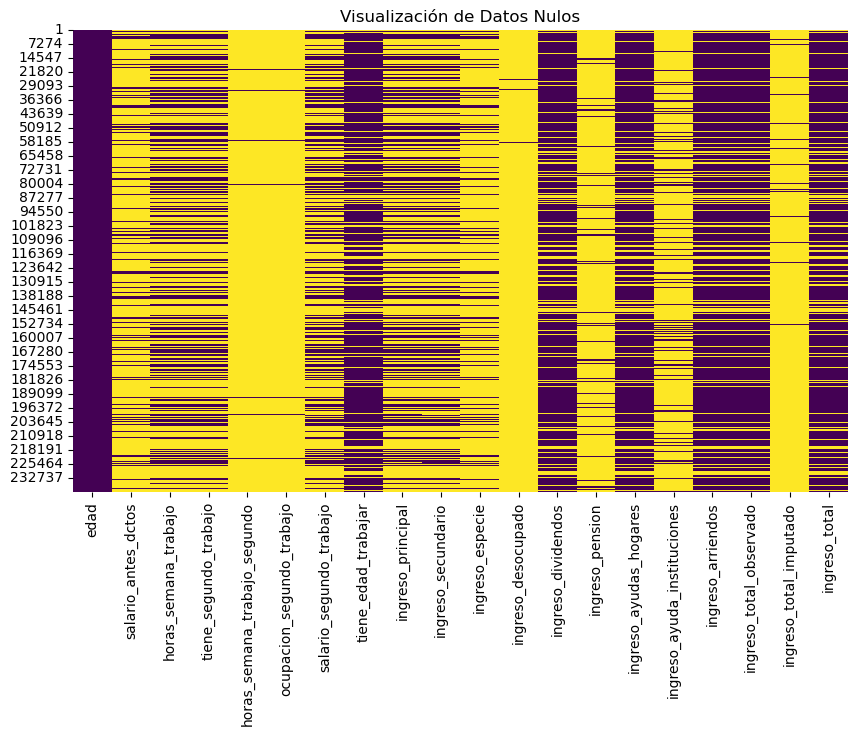

Conteo de datos nulos por columna:
edad                                 0
salario_antes_dctos             190155
horas_semana_trabajo            141920
tiene_segundo_trabajo           141920
horas_semana_trabajo_segundo    237588
ocupacion_segundo_trabajo       237588
salario_segundo_trabajo         142086
tiene_edad_trabajar              53451
ingreso_principal               143623
ingreso_secundario              142086
ingreso_especie                 190155
ingreso_desocupado              238007
ingreso_dividendos               53451
ingreso_pension                 222803
ingreso_ayudas_hogares           53451
ingreso_ayuda_instituciones     200565
ingreso_arriendos                53451
ingreso_total_observado          53451
ingreso_total_imputado          230280
ingreso_total                    53451
dtype: int64


In [236]:
columns_of_interest = [
    'edad', 'salario_antes_dctos', 'horas_semana_trabajo', 'tiene_segundo_trabajo', 
    'horas_semana_trabajo_segundo', 'ocupacion_segundo_trabajo', 
    'salario_segundo_trabajo', 'tiene_edad_trabajar', 'ingreso_principal', 
    'ingreso_secundario', 'ingreso_especie', 'ingreso_desocupado', 
    'ingreso_dividendos', 'ingreso_pension', 'ingreso_ayudas_hogares', 
    'ingreso_ayuda_instituciones', 'ingreso_arriendos', 'ingreso_total_observado', 
    'ingreso_total_imputado', 'ingreso_total'
]

# Visualización de valores nulos por columna
plt.figure(figsize=(10, 6))
sns.heatmap(df[columns_of_interest].isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de Datos Nulos')
plt.show()

# Conteo de valores nulos por columna
print("Conteo de datos nulos por columna:")
print(df[columns_of_interest].isnull().sum())

### Eliminando datos nulos

Comprendiendo que hay columnas con casi todos los datos nulos, vamos a eliminar aquellas con más de 200.000 datos nulos. Puesto que su mayoría de datos estarían vacíos y sería infactible hacer una imputación

In [237]:
# Obtener el número de datos nulos por columna
nulos_por_columna = df.isnull().sum()

# Filtrar y eliminar columnas con más de 200,000 datos nulos
columnas_a_eliminar = nulos_por_columna[nulos_por_columna > 200000].index

print("Columnas a eliminar: ", columnas_a_eliminar)

df = df.drop(columns=columnas_a_eliminar)

df.info()

Columnas a eliminar:  Index(['horas_semana_trabajo_segundo', 'ocupacion_segundo_trabajo',
       'ingreso_desocupado', 'ingreso_pension', 'ingreso_ayuda_instituciones',
       'ingreso_total_imputado'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 240001 entries, 1 to 240001
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     240001 non-null  int64  
 1   lugar_vivienda                       240001 non-null  object 
 2   edad                                 240001 non-null  int64  
 3   tiene_seguridad_social               240001 non-null  object 
 4   nivel_educativo                      179998 non-null  object 
 5   ocupacion                            186550 non-null  object 
 6   salario_antes_dctos                  49846 non-null   float64
 7   recibio_alimentos_pago_trabajo       240001 non-null  object 

### Identificando correlaciones

Con las columnas numéricas restantes, vamos a visualizar su distribución y correlación para saber si duplicarían info

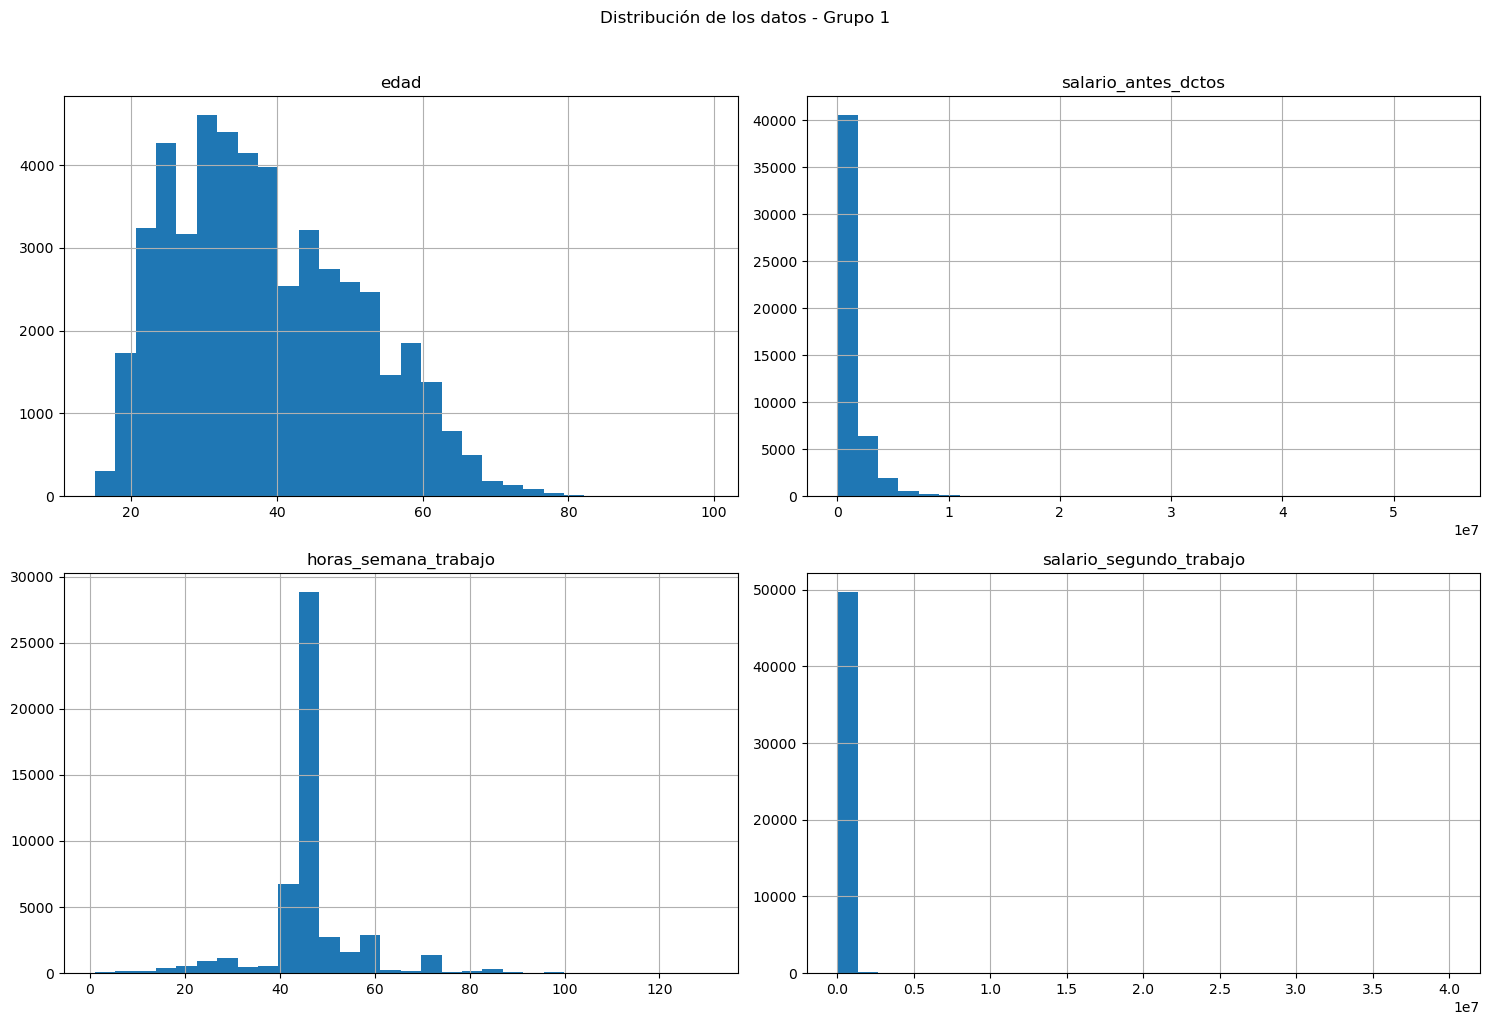

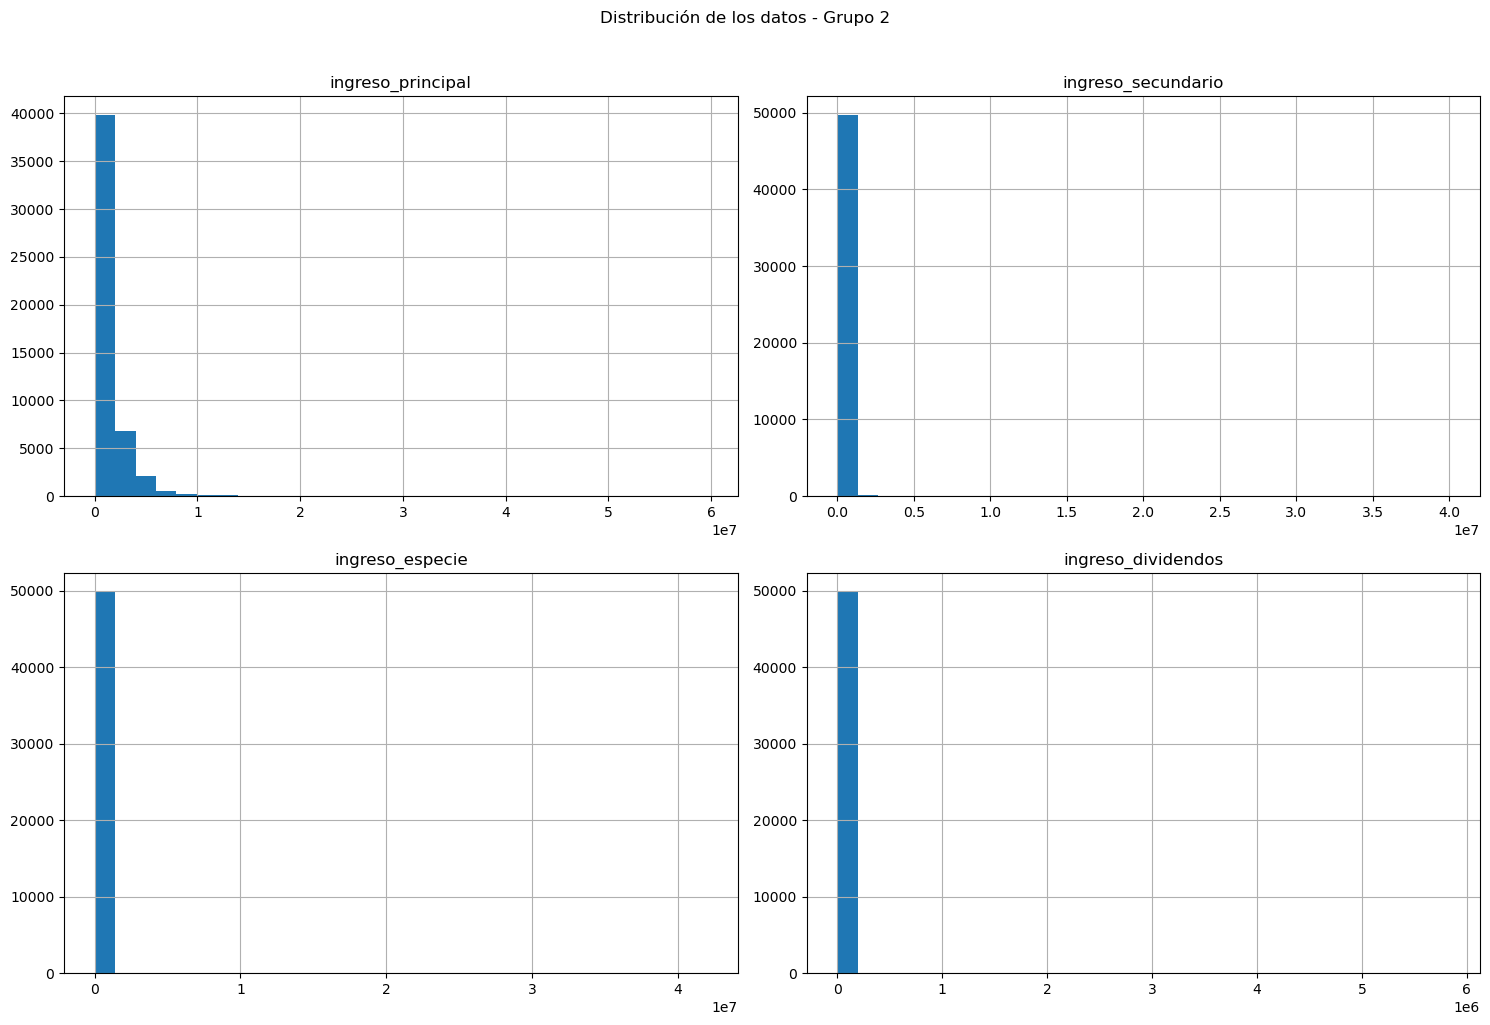

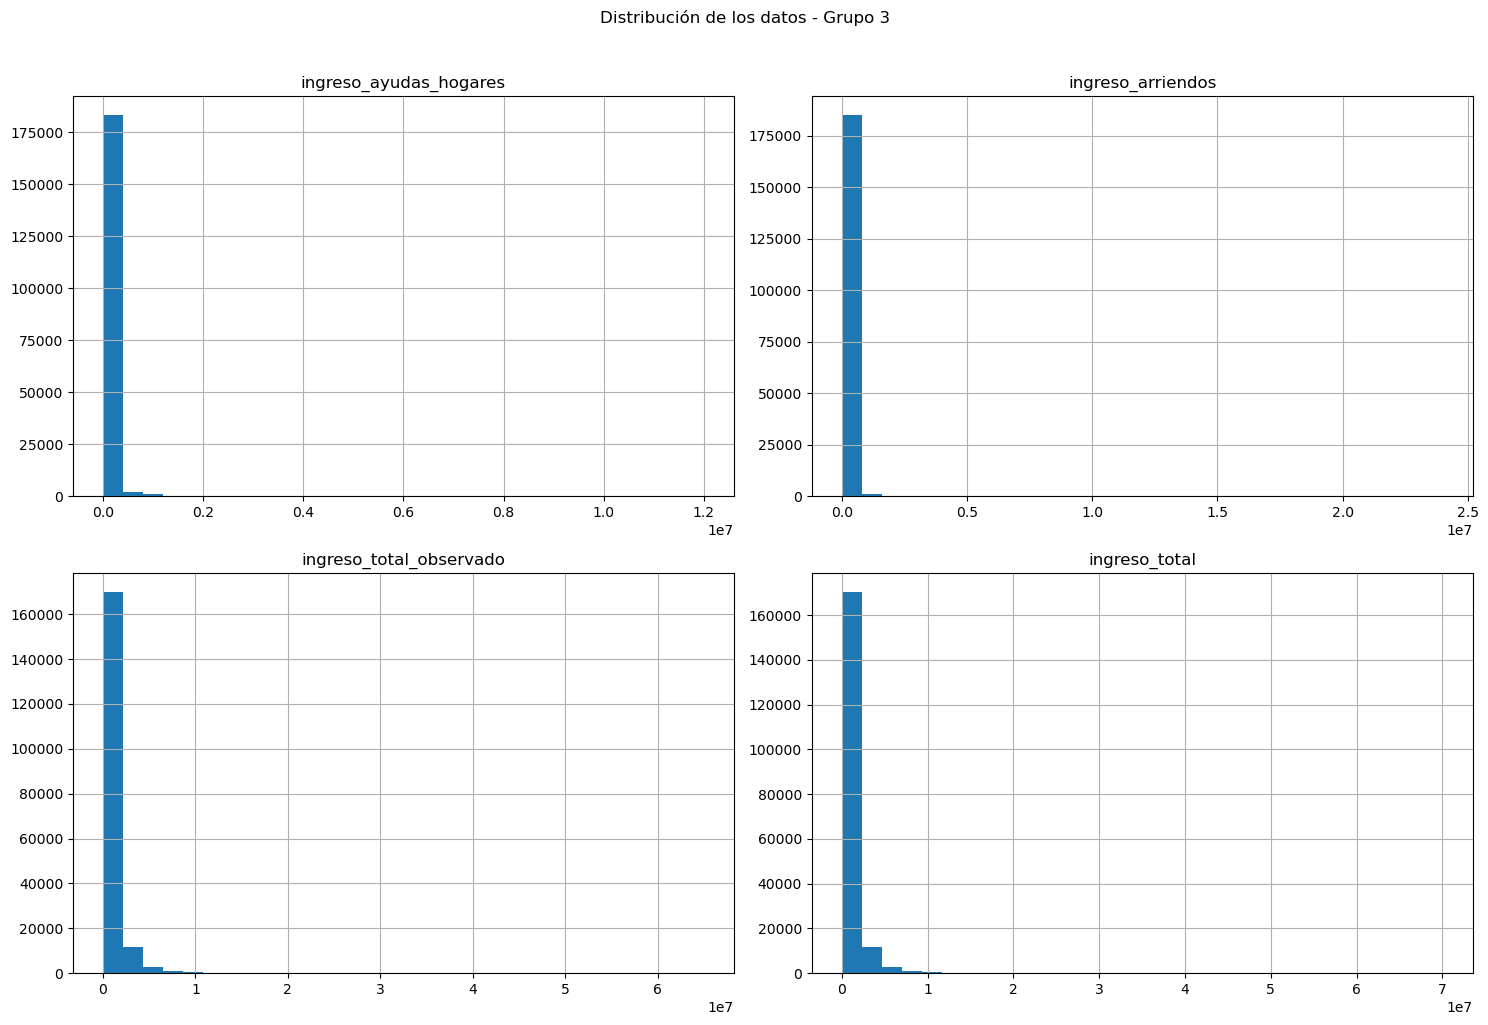

In [238]:
columns_of_interest = [
    'edad', 'salario_antes_dctos', 'horas_semana_trabajo', 'salario_segundo_trabajo', 
    'ingreso_principal', 'ingreso_secundario', 'ingreso_especie', 'ingreso_dividendos', 
    'ingreso_ayudas_hogares', 'ingreso_arriendos', 'ingreso_total_observado', 'ingreso_total'
]

def plot_column_histograms(df, columns, group_size=4):
    num_columns = len(columns)
    num_groups = int(np.ceil(num_columns / group_size))
    
    for i in range(num_groups):
        group_columns = columns[i * group_size:(i + 1) * group_size]
        df_cleaned = df[group_columns].dropna()  # Limpiar valores nulos de estas columnas
        
        df_cleaned.hist(bins=30, figsize=(15, 10))
        plt.suptitle(f'Distribución de los datos - Grupo {i + 1}', y=1.02)
        plt.tight_layout()
        plt.show()

# Llamar a la función con un tamaño de grupo de 4 columnas
plot_column_histograms(df, columns_of_interest, group_size=4)

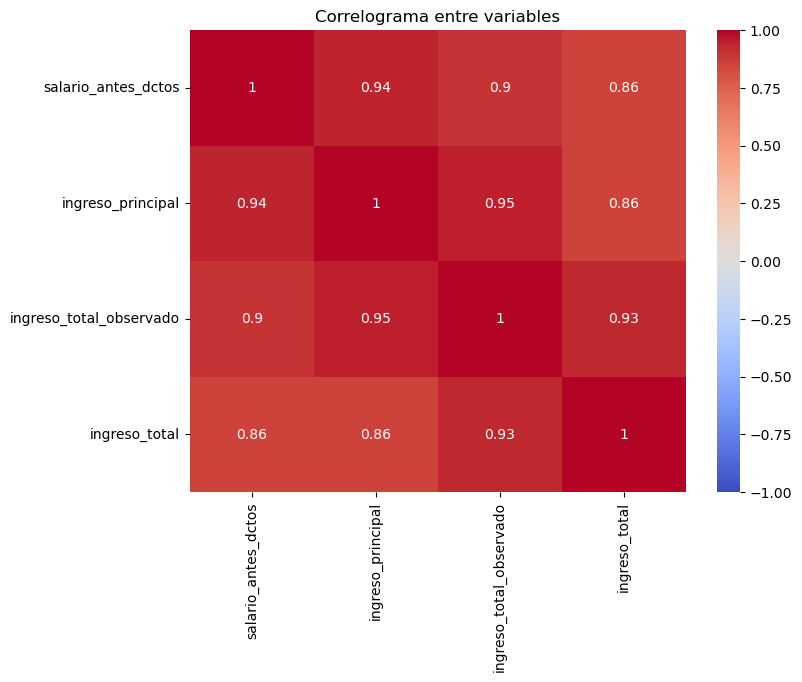

In [239]:
columns_of_interest = [
    'salario_antes_dctos', 'ingreso_principal', 'ingreso_total_observado', 'ingreso_total'
]

df_filtered = df[columns_of_interest]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlograma entre variables')
plt.show()

Como podemos observar, la mayoría de columnas referentes a salario o ingreso están correlacionadas. Se decide quedarse unicamente con la columna de ingreso_total_observado, y eliminar los datos nulos de esta puesto que en su mayoría no están nulos

In [240]:
# Eliminar las filas donde 'ingreso_total' es nulo
df = df.dropna(subset=['ingreso_total'])

df = df.drop(columns=['salario_antes_dctos', 'ingreso_principal', 'ingreso_total'])

# Verificar los cambios
print("Número de filas y columnas después de las eliminaciones:", df.shape)
print("Columnas restantes en el DataFrame:")
print(df.columns)

Número de filas y columnas después de las eliminaciones: (186550, 30)
Columnas restantes en el DataFrame:
Index(['n_personas_hogar', 'lugar_vivienda', 'edad', 'tiene_seguridad_social',
       'nivel_educativo', 'ocupacion', 'recibio_alimentos_pago_trabajo',
       'recibio_vivienda_pago_trabajo', 'recibio_transporte_empresa',
       'recibio_pago_especie', 'recibio_bonificaciones_anuales',
       'horas_semana_trabajo', 'cotiza_pension', 'tiene_segundo_trabajo',
       'salario_segundo_trabajo', 'recibio_pagos_arriendos',
       'recibio_pagos_pension', 'recibio_pagos_pension_alimentaria',
       'recibio_dinero_personas_residentes',
       'recibio_dinero_personas_extranjeras', 'recibio_ayuda_institucional',
       'recibio_pago_bancos', 'recibio_cesantias', 'tiene_edad_trabajar',
       'ingreso_secundario', 'ingreso_especie', 'ingreso_dividendos',
       'ingreso_ayudas_hogares', 'ingreso_arriendos',
       'ingreso_total_observado'],
      dtype='object')


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186550 entries, 1 to 240001
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  int64  
 1   lugar_vivienda                       186550 non-null  object 
 2   edad                                 186550 non-null  int64  
 3   tiene_seguridad_social               186550 non-null  object 
 4   nivel_educativo                      135336 non-null  object 
 5   ocupacion                            186550 non-null  object 
 6   recibio_alimentos_pago_trabajo       186550 non-null  object 
 7   recibio_vivienda_pago_trabajo        186550 non-null  object 
 8   recibio_transporte_empresa           186550 non-null  object 
 9   recibio_pago_especie                 186550 non-null  object 
 10  recibio_bonificaciones_anuales       186550 non-null  object 
 11  horas_semana_traba

### Limpiando columnas restantes

Se decide eliminar columnas con su mayoría de datos nulos y mapear columnas pendientes

In [242]:
df = df.drop(columns=[
    'tiene_segundo_trabajo', 
    'salario_segundo_trabajo', 
    'ingreso_secundario', 
    'ingreso_especie'
])

In [243]:
df = df.drop(columns=['cotiza_pension'])

df = df.rename(columns={'tiene_seguridad_social': 'cotiza_prestaciones'})

In [244]:
# Calcular el promedio de la columna 'horas_semana_trabajo' (ignorando los valores nulos)
mean_horas_semana_trabajo = df['horas_semana_trabajo'].mean()

# Reemplazar los valores nulos por el promedio calculado
df['horas_semana_trabajo'].fillna(mean_horas_semana_trabajo, inplace=True)

print("Valores nulos restantes en 'horas_semana_trabajo':", df['horas_semana_trabajo'].isnull().sum())

Valores nulos restantes en 'horas_semana_trabajo': 0


In [245]:
# Calcular la moda de la columna 'nivel_educativo'
mode_nivel_educativo = df['nivel_educativo'].mode()[0]

# Reemplazar los valores nulos por la moda calculada
df['nivel_educativo'].fillna(mode_nivel_educativo, inplace=True)

# Verificar que no queden valores nulos en la columna
print("Valores nulos restantes en 'nivel_educativo':", df['nivel_educativo'].isnull().sum())

Valores nulos restantes en 'nivel_educativo': 0


### Tratamiento especial para la variable edad

Como podemos observar, la variable edad contiene datos atípicos por que llegan hasta los 107 años

In [246]:
df['edad'].describe()

count    186550.000000
mean         41.954597
std          18.461879
min          15.000000
25%          26.000000
50%          39.000000
75%          56.000000
max         107.000000
Name: edad, dtype: float64

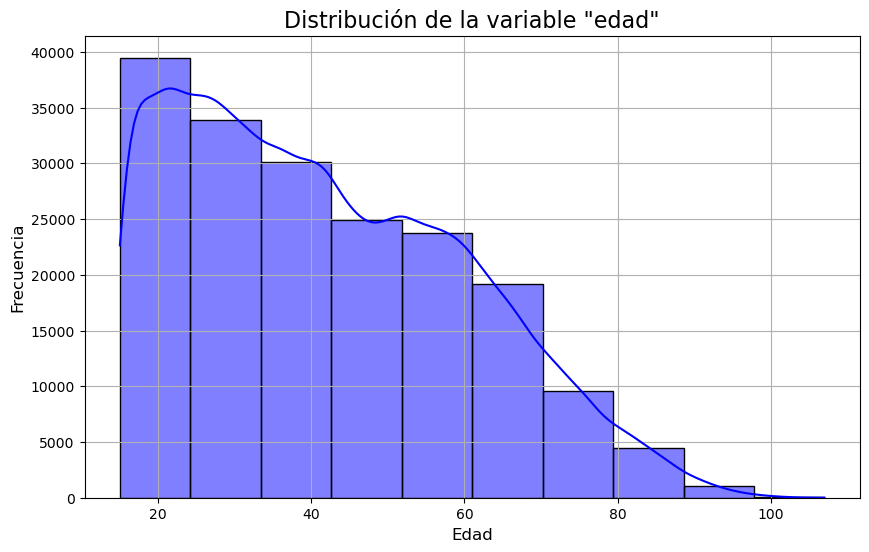

In [247]:
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], bins=10, kde=True, color='blue')
plt.title('Distribución de la variable "edad"', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

In [248]:
cuartil_90 = df['edad'].quantile(0.99)
print(cuartil_90)

86.0


Se decide tener como máximo una edad de 86, puesto que se espera no se trate de una población trabajadora

In [249]:
df.loc[df['edad'] > 86, 'edad'] = 86

In [250]:
df['edad'].describe()

count    186550.000000
mean         41.910474
std          18.347632
min          15.000000
25%          26.000000
50%          39.000000
75%          56.000000
max          86.000000
Name: edad, dtype: float64

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186550 entries, 1 to 240001
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  int64  
 1   lugar_vivienda                       186550 non-null  object 
 2   edad                                 186550 non-null  int64  
 3   cotiza_prestaciones                  186550 non-null  object 
 4   nivel_educativo                      186550 non-null  object 
 5   ocupacion                            186550 non-null  object 
 6   recibio_alimentos_pago_trabajo       186550 non-null  object 
 7   recibio_vivienda_pago_trabajo        186550 non-null  object 
 8   recibio_transporte_empresa           186550 non-null  object 
 9   recibio_pago_especie                 186550 non-null  object 
 10  recibio_bonificaciones_anuales       186550 non-null  object 
 11  horas_semana_traba

### Mapeo de columnas booleanas

Poseemos muchas columnas con dos opciones. Se decide mapearlas a booleano

In [252]:
columnas = [
    'cotiza_prestaciones',
    'recibio_alimentos_pago_trabajo',
    'recibio_vivienda_pago_trabajo',
    'recibio_transporte_empresa',
    'recibio_pago_especie',
    'recibio_bonificaciones_anuales',
    'recibio_pagos_arriendos',
    'recibio_pagos_pension',
    'recibio_pagos_pension_alimentaria',
    'recibio_dinero_personas_residentes',
    'recibio_dinero_personas_extranjeras',
    'recibio_ayuda_institucional',
    'recibio_pago_bancos',
    'recibio_cesantias',
    'tiene_edad_trabajar'
]

for columna in columnas:
    print(f"Cuenta de valores únicos para la columna '{columna}':")
    print(df[columna].value_counts())
    print()

Cuenta de valores únicos para la columna 'cotiza_prestaciones':
cotiza_prestaciones
Si                     175244
No                      11070
No sabe, no informa       236
Name: count, dtype: int64

Cuenta de valores únicos para la columna 'recibio_alimentos_pago_trabajo':
recibio_alimentos_pago_trabajo
Otro                   136704
No                      45861
Sí                       3815
No sabe, no informa       170
Name: count, dtype: int64

Cuenta de valores únicos para la columna 'recibio_vivienda_pago_trabajo':
recibio_vivienda_pago_trabajo
Otro                   136704
No                      48259
Sí                       1432
No sabe, no informa       155
Name: count, dtype: int64

Cuenta de valores únicos para la columna 'recibio_transporte_empresa':
recibio_transporte_empresa
Otro                   136704
No                      48748
Sí                        972
No sabe, no informa       126
Name: count, dtype: int64

Cuenta de valores únicos para la columna 'recibio_

In [254]:
replace_sino = {
    'Si': True,
    'Sí': True,
    'No sabe, no informa': False,
    'Otro': False,
    'No': False
}

for columna in columnas:
    df[columna] = df[columna].map(replace_sino)
    

df.head()

,n_personas_hogar,lugar_vivienda,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,...,recibio_dinero_personas_residentes,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado
1,1,urbano,33,False,Media,Trabajando,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,768000.0
2,1,urbano,31,False,Media,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
6,1,urbano,76,False,Ninguno,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
7,1,urbano,58,True,Básica primaria,Trabajando,False,False,False,False,...,False,False,True,False,False,True,0.0,0.0,0.0,792500.0
8,1,urbano,61,True,Básica primaria,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,50000.0


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186550 entries, 1 to 240001
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  int64  
 1   lugar_vivienda                       186550 non-null  object 
 2   edad                                 186550 non-null  int64  
 3   cotiza_prestaciones                  186550 non-null  bool   
 4   nivel_educativo                      186550 non-null  object 
 5   ocupacion                            186550 non-null  object 
 6   recibio_alimentos_pago_trabajo       186550 non-null  bool   
 7   recibio_vivienda_pago_trabajo        186550 non-null  bool   
 8   recibio_transporte_empresa           186550 non-null  bool   
 9   recibio_pago_especie                 186550 non-null  bool   
 10  recibio_bonificaciones_anuales       186550 non-null  bool   
 11  horas_semana_traba

## Exportar archivo limpio

Se exportan los datos limpios para el entrenamiento en la carpeta data

In [256]:
archivo_salida = 'data/data_clean.csv'

# Exportar el DataFrame a un archivo CSV
df.to_csv(archivo_salida, index=False)

print(f"DataFrame exportado a {archivo_salida}")

DataFrame exportado a data/data_clean.csv
